In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
np.random.seed(seed=777)
#Fake some data for exhibition purpose
X = np.random.uniform(0,1,500)
X = X.reshape(-1,10)
print(X)
#This is a 50 by 10 dataset

import pandas as pd

[[0.15266373 0.30235661 0.06203641 0.45986034 0.83525338 0.92699705
  0.72698898 0.76849622 0.26920507 0.64402929]
 [0.09337326 0.07968589 0.58961375 0.34334054 0.98887615 0.62647321
  0.68177928 0.55225681 0.26886006 0.37325939]
 [0.2229281  0.1864426  0.39064809 0.19316241 0.61091093 0.88280845
  0.62233882 0.25311894 0.17993031 0.81640447]
 [0.22537162 0.51685714 0.51849582 0.60037494 0.53262048 0.01331005
  0.52409726 0.89588471 0.76990129 0.1228517 ]
 [0.29587269 0.61202358 0.72613812 0.46349747 0.76911037 0.19163103
  0.55786672 0.55077816 0.47222549 0.79188496]
 [0.11524968 0.6813039  0.36233361 0.34420889 0.44951875 0.02694226
  0.41524769 0.9222317  0.09120557 0.31512178]
 [0.52802224 0.32806203 0.44891554 0.01633442 0.0970269  0.69258857
  0.83594341 0.42432199 0.8487743  0.54679121]
 [0.35410346 0.72724968 0.09385168 0.8928588  0.33625828 0.89183268
  0.296849   0.30164829 0.80624061 0.83760997]
 [0.63428133 0.3113273  0.02944858 0.39977732 0.51817346 0.00738845
  0.77494778

In [2]:
m = np.shape(X)[0]
p = np.shape(X)[1]
mm = int(m*(m-1)/2)
maxCorrelation = 0.95
maxCols = p
maxIteration = p+1
print(m,p,maxCorrelation,maxIteration)

50 10 0.95 11


In [3]:
def matProd(mat1,mat2):
    #print(np.shape(mat1),np.shape(mat2))
    d = np.matmul(mat1.T,mat2)
    d1 = np.trace(d)
    return (d1)
matProd(X,X)

151.89852200438813

In [4]:
#Col algorithm
from scipy.spatial import distance_matrix
#print(previousColDist)
#print(allColDist)

def myRange(start,stop,step):
    if start == stop: 
        return ([stop])
    else:
        return (np.arange(start,stop,step))

def dist(matrix):
    d = distance_matrix(matrix,matrix)
    return (d**2)

correlation = 0.0
selectedCols = []
mm = int( m*(m-1)/2 - 1 )
previousColDist = np.zeros((m,m))
previousColDist = np.asarray(previousColDist)
allColDist = dist(X) #m*(m-1)/2

#VERBOSE = True for debugging
VERBOSE = False

iterations = 0
bestColumn = 0 
bestCorrelation = 0.0

print('Maximal select-able number of dimensions',maxCols)
while (correlation<maxCorrelation and len(selectedCols)<maxCols) and iterations<50:
    print('Selected columns: ',selectedCols)
    print('Cumulative correlation =',bestCorrelation)
    print('Iteration :',iterations)
    print('Coefficient threshold =',maxCorrelation)
    #print('previousColDist',previousColDist)
    bestColumn = 0 
    bestCorrelation = 0.0
    previousBestCorrelation = 0.0
    iterations = iterations + 1

    for j in myRange(1,p,1):
        #print(j)
        if j not in selectedCols:
            X_j = X[:,j-1].reshape(-1,1)
            jColDist = dist(X_j)
            cumColDist = np.add(jColDist,previousColDist)
            #print(np.shape(jColDist))
            #Frobenius matrix coefficient 
            #corr(A,B) = trace(A^{T}B)/sqrt(trace(A^{T}A)*trace(B^{T}B))
            correlation = matProd(cumColDist,allColDist)/np.sqrt( (matProd(cumColDist,cumColDist)*matProd(allColDist,allColDist) ) )
            if VERBOSE:print('Correlation =',correlation,' if we include column',j,'(represented as ',j-1,'in numpy array)')
            if correlation > bestCorrelation:
                bestColumn = j
                bestCorrelation = np.copy(correlation)
    if VERBOSE:print('***Best column to include is the column',bestColumn,' with correlation', bestCorrelation)
    if previousBestCorrelation > bestCorrelation or bestCorrelation > 1:
        bestCorrelation = np.copy(previousBestCorrelation)
        break
    X_bestColumn = X[:,bestColumn-1]
    X_bestColumn = X_bestColumn.reshape(-1,1)
    bestColDist = dist(X_bestColumn)
    #print('bestColDist',bestColDist)
    previousColDist = np.add(bestColDist,previousColDist)
    if bestColumn not in selectedCols and bestColumn != 0:
        selectedCols.append(bestColumn)
    previousBestCorrelation = np.copy(bestCorrelation)

print('Output selected columns: ',selectedCols)
print('Final cumulative coefficient (coefficient between full distance matrix and selected column distance matrix): ',bestCorrelation)
            

Maximal select-able number of dimensions 10
Selected columns:  []
Cumulative correlation = 0.0
Iteration : 0
Coefficient threshold = 0.95
Selected columns:  [4]
Cumulative correlation = 0.7244636945332077
Iteration : 1
Coefficient threshold = 0.95
Selected columns:  [4, 5]
Cumulative correlation = 0.8462894477247339
Iteration : 2
Coefficient threshold = 0.95
Selected columns:  [4, 5, 7]
Cumulative correlation = 0.9051257211714339
Iteration : 3
Coefficient threshold = 0.95
Selected columns:  [4, 5, 7, 6]
Cumulative correlation = 0.9389179466360492
Iteration : 4
Coefficient threshold = 0.95
Output selected columns:  [4, 5, 7, 6, 8]
Final cumulative coefficient (coefficient between full distance matrix and selected column distance matrix):  0.9590956327563951


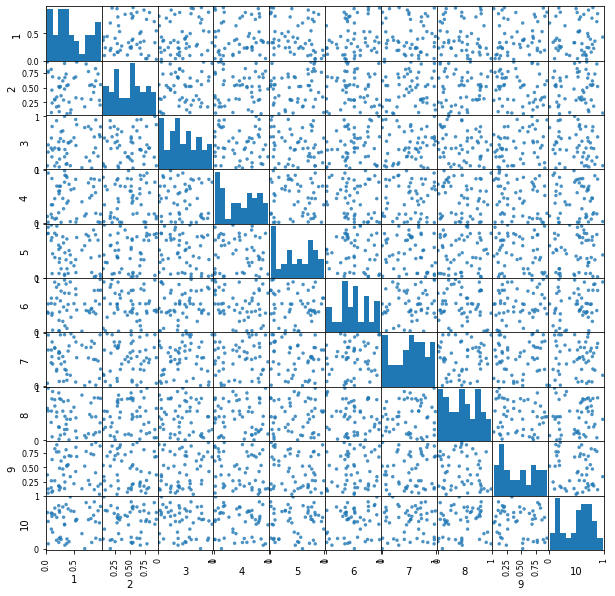

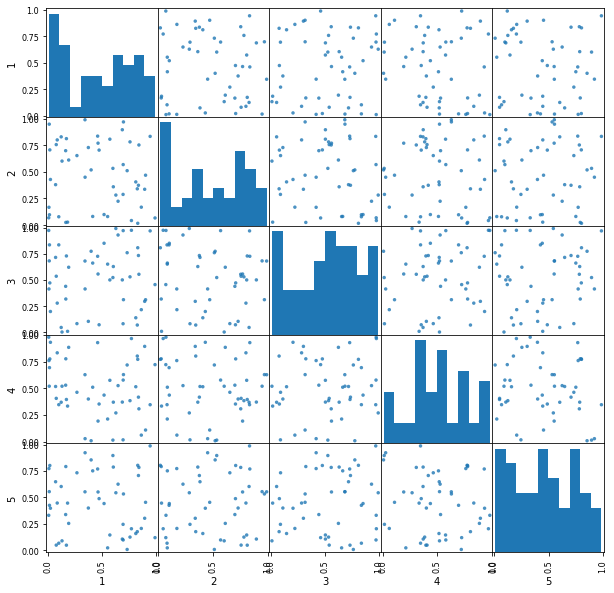

In [5]:
members_index = [x - 1 for x in selectedCols]
X_df = pd.DataFrame(data=X[0:,0:],index=X[0:,0],columns=myRange(1,(np.shape(X)[1]+1),1))
X_reduced = X[:,members_index]
X_reduced_df = pd.DataFrame(data=X_reduced[0:,0:],index=X_reduced[0:,0],columns=myRange(1,(np.shape(X_reduced)[1]+1),1))

g1 = pd.plotting.scatter_matrix(X_df, figsize=(10,10), marker = 'o', hist_kwds = {'bins': 10}, s = 12, alpha = 0.8)
new_labels = [round(float(i.get_text()), 2) for i in g1[0,0].get_yticklabels()]
g1[0,0].set_yticklabels(new_labels)
plt.show()

g2 = pd.plotting.scatter_matrix(X_reduced_df, figsize=(10,10), marker = 'o', hist_kwds = {'bins': 10}, s = 12, alpha = 0.8)
new_labels = [round(float(i.get_text()), 2) for i in g2[0,0].get_yticklabels()]
g2[0,0].set_yticklabels(new_labels)
plt.show()